In [1]:
import numpy as np
import pandas as pd
import cv2
import imutils
from IPython.display import display
from PIL import Image

In [2]:
ls


Untitled.ipynb  custom_object_detection_train/  foot.ipynb


In [4]:
data = pd.read_csv('newest.csv')

In [5]:
data.head()

,foot_id,url,l_0_x,l_0_y,l_1_x,l_1_y,l_2_x,l_2_y,l_3_x,l_3_y,...,r_17_v,r_18_v,r_19_v,r_20_v,r_21_v,r_22_v,r_23_v,r_24_v,l_probability,r_probability
0,2649,https://newvalues.s3-us-west-1.amazonaws.com/1...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,True,True,True,False,False,False,False,False,0.0,1.0
1,58,https://newvalues.s3-us-west-1.amazonaws.com/c...,0.048055,0.047930,0.014859,-0.510058,-0.014845,-0.018323,0.099175,-0.025737,...,False,False,False,False,False,False,False,False,1.0,0.0
2,2978,https://newvalues.s3-us-west-1.amazonaws.com/2...,-0.265351,0.384186,-0.196627,-0.656218,-0.403882,0.244417,-0.068591,0.266565,...,True,True,True,True,True,True,False,False,1.0,1.0
3,69,https://newvalues.s3-us-west-1.amazonaws.com/I...,-0.091605,0.272204,-0.121314,-0.158309,-0.170479,0.232533,-0.036883,0.214789,...,True,True,True,True,True,True,True,False,1.0,1.0
4,2438,https://newvalues.s3-us-west-1.amazonaws.com/c...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,True,True,True,False,True,False,True,False,0.0,1.0


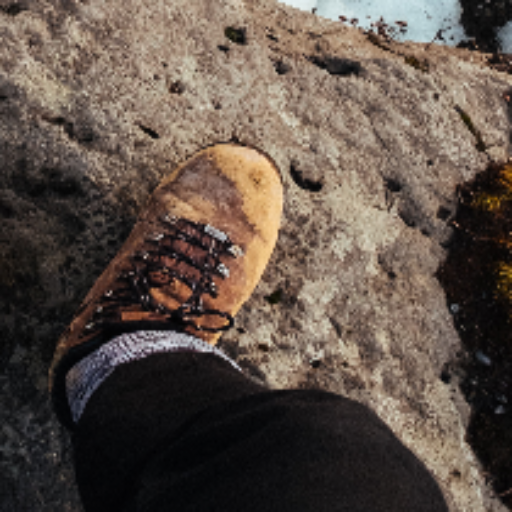

In [6]:
idx = 4
img_url = data.iloc[idx].url

image = imutils.url_to_image(img_url)

img=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
display(Image.fromarray(img))

In [7]:
right_points_x = [i for i in data.columns if 'r_' in i and 'x' in i and 'v' not in i and 'p' not in i]
right_points_y = [i for i in data.columns if 'r_' in i and 'y' in i and 'v' not in i and 'p' not in i]

In [8]:
left_points_x = [i for i in data.columns if 'l_' in i and 'x' in i and 'v' not in i and 'p' not in i]
left_points_y = [i for i in data.columns if 'l_' in i and 'y' in i and 'v' not in i and 'p' not in i]

In [9]:
r_max_x=-99 
r_min_x=100 
r_max_y=-99
r_min_y=100

l_max_x=-99 
l_min_x=100 
l_max_y=-99
l_min_y=100

for i in right_points_x:
    r_max_x = max(r_max_x, data.iloc[idx][i])
    r_min_x = min(r_min_x, data.iloc[idx][i])
    
for i in right_points_y:
    r_max_y = max(r_max_y, data.iloc[idx][i])
    r_min_y = min(r_min_y, data.iloc[idx][i])
    
for i in left_points_x:
    l_max_x = max(l_max_x, data.iloc[idx][i])
    l_min_x = min(l_min_x, data.iloc[idx][i])
    
for i in left_points_y:
    l_max_y = max(l_max_y, data.iloc[idx][i])
    l_min_y = min(l_min_y, data.iloc[idx][i])




In [10]:
[l_max_x, l_min_x, l_max_y, l_min_y] = np.multiply([l_max_x, l_min_x, l_max_y, l_min_y],512)

In [11]:
[r_max_x, r_min_x, r_max_y, r_min_y] = np.multiply([r_max_x, r_min_x, r_max_y, r_min_y],512)

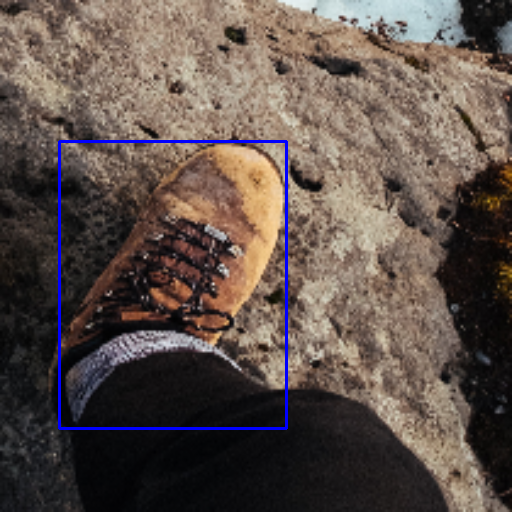

In [12]:
image = cv2.rectangle(image,(int(r_min_x)+256,256-int(r_min_y)),(int(r_max_x)+256,256-int(r_max_y)),(255,0,0), 2)
img=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
display(Image.fromarray(img))

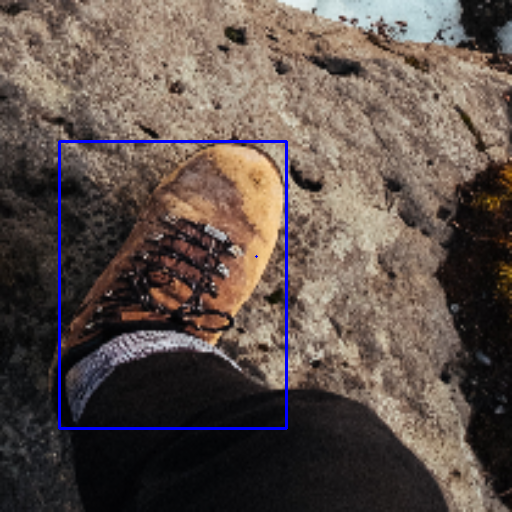

In [13]:
image = cv2.rectangle(image,(int(l_min_x)+256,-(int(l_min_y)-256)),(int(l_max_x)+256,-(int(l_max_y)-256)),(255,0,0), 2)
img=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
display(Image.fromarray(img))

In [14]:
int(r_min_x)+256, 256-int(r_min_y)

(59, 428)

In [15]:
int(l_min_x)+256, -(int(l_min_y)-256)

(256, 256)

In [16]:
int(l_max_x)+256, -(int(l_max_y)-256)

(256, 256)

In [17]:
[l_max_x, l_min_x, l_max_y, l_min_y]



[0.0, 0.0, 0.0, 0.0]

In [18]:
data.shape[0]



13676

In [ ]:
import urllib.request 
for idx,row_obj in data.iterrows():
    if 'png' in row_obj.url:
        urllib.request.urlretrieve(row_obj.url, str(row_obj.foot_id) + '.png')
    elif 'jpg' in row_obj.url:
        urllib.request.urlretrieve(row_obj.url, str(row_obj.foot_id) + '.jpg')

In [ ]:
right_points_x = [i for i in data.columns if 'r_' in i and 'x' in i and 'v' not in i and 'p' not in i]
right_points_y = [i for i in data.columns if 'r_' in i and 'y' in i and 'v' not in i and 'p' not in i]
left_points_x = [i for i in data.columns if 'l_' in i and 'x' in i and 'v' not in i and 'p' not in i]
left_points_y = [i for i in data.columns if 'l_' in i and 'y' in i and 'v' not in i and 'p' not in i]

xml_list_lr = []
xml_list = []
for idx in range(data.shape[0]):
    img_url = data.iloc[idx].url
    image = imutils.url_to_image(img_url)
    
    r_max_x=-99 
    r_min_x=100 
    r_max_y=-99
    r_min_y=100

    l_max_x=-99 
    l_min_x=100 
    l_max_y=-99
    l_min_y=100

    for i in right_points_x:
        r_max_x = max(r_max_x, data.iloc[idx][i])
        r_min_x = min(r_min_x, data.iloc[idx][i])

    for i in right_points_y:
        r_max_y = max(r_max_y, data.iloc[idx][i])
        r_min_y = min(r_min_y, data.iloc[idx][i])

    for i in left_points_x:
        l_max_x = max(l_max_x, data.iloc[idx][i])
        l_min_x = min(l_min_x, data.iloc[idx][i])

    for i in left_points_y:
        l_max_y = max(l_max_y, data.iloc[idx][i])
        l_min_y = min(l_min_y, data.iloc[idx][i])
    
    r_min_x = int(r_min_x)+256
    r_min_y = 256-int(r_min_y)
    r_max_x = int(r_max_x)+256
    r_max_y = 256-int(r_max_y)
    
    l_min_x = int(l_min_x)+256
    l_min_y = 256-int(l_min_y)
    l_max_x = int(l_max_x)+256
    l_max_y = 256-int(l_max_y)
    
    if(data.iloc[idx].l_probability > 0):
        z='.png'
        if '.jpg' in data.iloc[idx].url:
            z='.jpg'
        xml_list_lr.append([str(data.iloc[idx].food_id)+z,520,520,'left_foot',l_min_x,l_min_y,l_max_x,l_max_y])
        xml_list.append([str(data.iloc[idx].food_id)+z,520,520,'foot',l_min_x,l_min_y,l_max_x,l_max_y])
    if(data.iloc[idx].r_probability > 0):
        z='.png'
        if '.jpg' in data.iloc[idx].url:
            z='.jpg'
        xml_list_lr.append([str(data.iloc[idx].food_id)+z,520,520,'right_foot',r_min_x,r_min_y,r_max_x,r_max_y])
        xml_list.append([str(data.iloc[idx].food_id)+z,520,520,'foot',r_min_x,r_min_y,r_max_x,r_max_y]